## How do weather patterns (rain, temperature, ect.) affect the occurance of specific types of citations in Scottsdale AZ?

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
weather = pd.read_csv('data/Scottsdale_historical_weather.csv',
                     parse_dates=['DATE'],
                     index_col='DATE')
citations = pd.read_csv('https://raw.githubusercontent.com/mrkjhsn/Scottsdale_Datasets/master/citations.csv',
                       parse_dates=['Citation Date'],
                       index_col='Citation Date')

In [23]:
weather.dtypes

STATION     object
NAME        object
AWND       float64
PGTM       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG       float64
TMAX       float64
TMIN       float64
WDF2       float64
WDF5       float64
WSF2       float64
WSF5       float64
WT01       float64
WT02       float64
WT03       float64
WT07       float64
WT08       float64
dtype: object

In [24]:
weather.head()

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT07,WT08
DATE,,,,,,,,,,,,,,,,,,,
2016-01-01,USW00003192,"SCOTTSDALE MUNICIPAL AIRPORT, AZ US",1.34,NaN,0.00,0.0,0.0,NaN,66.0,35.0,90.0,90.0,8.1,11.0,NaN,NaN,NaN,NaN,NaN
2016-01-02,USW00003192,"SCOTTSDALE MUNICIPAL AIRPORT, AZ US",2.01,NaN,0.00,0.0,0.0,NaN,69.0,43.0,150.0,260.0,6.9,11.0,NaN,NaN,NaN,NaN,NaN
2016-01-03,USW00003192,"SCOTTSDALE MUNICIPAL AIRPORT, AZ US",4.25,NaN,0.00,0.0,0.0,NaN,69.0,46.0,90.0,90.0,15.0,19.9,NaN,NaN,NaN,NaN,NaN
2016-01-04,USW00003192,"SCOTTSDALE MUNICIPAL AIRPORT, AZ US",6.49,NaN,0.45,0.0,0.0,NaN,65.0,51.0,120.0,110.0,16.1,23.9,NaN,NaN,NaN,NaN,NaN
2016-01-05,USW00003192,"SCOTTSDALE MUNICIPAL AIRPORT, AZ US",3.36,NaN,0.18,0.0,0.0,NaN,55.0,51.0,110.0,110.0,13.0,17.0,NaN,NaN,NaN,NaN,NaN


In [26]:
# exclude information about weather station since that isn't relevant
weather = weather.iloc[:, 2:]

### The meanings behind the weather  abbreviations
https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

- AWND = Average daily wind speed (meters per second or miles per hour as per user preference) 
- PGTM = Peak gust time (hours and minutes, i.e., HHMM)
- PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
- TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
- TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
- WDF2 = Direction of fastest 2-minute wind (degrees)
- WDF5 = Direction of fastest 5-second wind (degrees)
- WSF2 = Fastest 2-minute wind speed (miles per hour or meters per second as per user preference)
- WSF5 = Fastest 5-second wind speed (miles per hour or meters per second as per user preference)
- WT** = Weather Type where ** has one of the following values: 
 - 01 = Fog, ice fog, or freezing fog (may include heavy fog)
 - 02 = Heavy fog or heaving freezing fog (not always distinguished from fog)
 - 03 = Thunder
 - 07 = Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction 
 - 08 = Smoke or haze 

In [83]:
# how many weather types have there been?
weather.iloc[:,-5:].sum()

WT01     90.0
WT02      3.0
WT03    109.0
WT07      1.0
WT08     98.0
dtype: float64

In [28]:
# remove columns for wind direction
# and snow
weather.drop([
    'SNOW',
    'WDF2',
    'WDF5'
], axis=1, inplace=True)

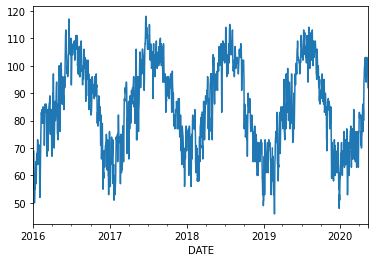

In [29]:
# plot temerature to confirm the seasonal trend
weather.TMAX.plot();

This appears to be as expected.

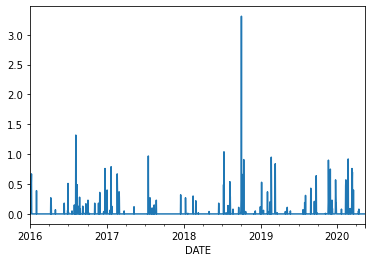

In [30]:
weather.PRCP.plot();

I didn't fully appreciate how much rain fell in the summer of 2018.

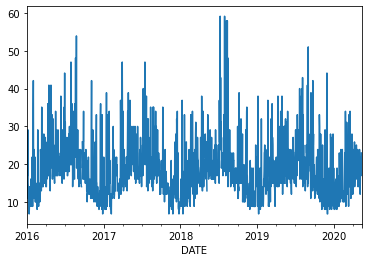

In [31]:
weather.WSF5.plot();

Interesting to see how wind speeds typically pick up during the hottest months of the year.  This seems consistent since winds often stoke wildfires during the hot, dry months of the year.

### Join weather data to citation data

In [32]:
citations.dtypes

Citation #                     int64
Arizona Statute Code          object
Beat                         float64
Charge Description            object
Citation Time                  int64
Citation Type Code            object
Citation Type Description     object
Cited Person                  object
Cited Person Age              object
Cited Person Ethnicity        object
Cited Person Race             object
Cited Person Sex              object
City                          object
District                      object
Officer Badge #               object
State                         object
Street                        object
Street Number                 object
Zip                           object
Zone                          object
tcmainid                       int64
dtype: object

In [33]:
# aggregate citations and weather
citations_agg_by_day = citations.groupby([citations.index, 'Charge Description']).size().unstack()

citations_with_weather = citations_agg_by_day.merge(weather, left_index=True, right_index=True)

In [34]:
citations_with_weather.head(20)

,2 Emergency Brake App-Air Sys,2 Headlamps Required For Motor Vehicles,Accident-Strike Fixture-Fail to Stop/Notify Owner,Accidents - Fail to Give Info-Name Add Etc.,Accidents - Fail to Leave Required Info,Accidents - Fail to Locate Owner,Accidents - Fail to Remain-Damage Attended Veh,Accidents - Fail to Remain-Injury or Death,Accidents - Fail to Show Driver`s License,Accidents - Fail to Stop-Damage Attended Vehicle,...,TAVG,TMAX,TMIN,WSF2,WSF5,WT01,WT02,WT03,WT07,WT08
2017-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83.0,62.0,14.1,21.0,NaN,NaN,NaN,NaN,NaN
2017-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,85.0,59.0,12.1,16.1,NaN,NaN,NaN,NaN,NaN
2017-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,88.0,57.0,8.9,12.1,NaN,NaN,NaN,NaN,NaN
2017-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,87.0,58.0,10.1,13.0,NaN,NaN,NaN,NaN,NaN
2017-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,90.0,66.0,12.1,16.1,NaN,NaN,NaN,NaN,NaN
2017-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,93.0,62.0,8.9,12.1,NaN,NaN,NaN,NaN,NaN
2017-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.0,68.0,12.1,15.0,NaN,NaN,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.0,66.0,14.1,18.1,NaN,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,95.0,66.0,10.1,14.1,NaN,NaN,NaN,NaN,NaN
2017-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,89.0,67.0,13.0,19.9,NaN,NaN,NaN,NaN,NaN


In [92]:
# aggregate citations and precipitation
# compare just one weather feature
citations_agg_by_day = citations.groupby([citations.index, 'Charge Description']).size().unstack()

citations_with_rain = citations_agg_by_day.merge(weather['PRCP'], left_index=True, right_index=True)

In [38]:
citations_with_rain

,2 Emergency Brake App-Air Sys,2 Headlamps Required For Motor Vehicles,Accident-Strike Fixture-Fail to Stop/Notify Owner,Accidents - Fail to Give Info-Name Add Etc.,Accidents - Fail to Leave Required Info,Accidents - Fail to Locate Owner,Accidents - Fail to Remain-Damage Attended Veh,Accidents - Fail to Remain-Injury or Death,Accidents - Fail to Show Driver`s License,Accidents - Fail to Stop-Damage Attended Vehicle,...,Violation of Lighted Lamp Requirements,Violation of Restricted Driver`s License,Void Charge,Waste of Finite Resource <=65mph,Waste of Finite Resource>65mph,White Flag Required On Towing Connection,White License Plate/Back Up Lamp,Windshield Required/Trucks,Yield to Ped Crossing Roadway,PRCP
2017-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
2017-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0
2017-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [98]:
# remove duplicates and NaN values
# https://stackoverflow.com/questions/48395350/how-to-remove-duplicates-from-correlation-in-pandas

dataCorr = citations_with_rain.corr()

dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

In [99]:
# filter for only precipication correlations
dataCorr.loc[:, 'PRCP'].sort_values(ascending=False).head(20)

Violation of Restricted Driver`s License         0.999167
Theft-Obtain By Misrepresent                     0.997629
Illegal Left Turn On Red Light                   0.951258
Vehicle Stopped In Bike Lane                     0.851852
No Business License                              0.834881
Extreme DUI-BAC .20 or More                      0.694335
Fail to Stop at Flashing Red Signal              0.495092
Criminal Littering/Polluting-Drop                0.445132
Improper Material/Tint On Window                 0.186634
Loading or Unloading In Through Lane             0.093580
Resist Arrest-Engage In Passive Resistance       0.080512
Display M.I. Suspended Plate                     0.077375
Refuse to Provide Truthful Name                  0.065775
Failure to Control Speed to Avoid A Collision    0.058616
Liquor-Consume In Public                         0.043433
Following Too Close                              0.042855
Expired Out-Of-State Registration                0.037471
Fail to Stop F

Failing to stop at flashing red signal is the only citation that seems to be most appropriate to increase during rain.

In [95]:
# join citations with maxium temperatures
citations_with_temperature = citations_agg_by_day.merge(weather['TMAX'], left_index=True, right_index=True)

In [96]:
# remove duplicates and NaN values
# https://stackoverflow.com/questions/48395350/how-to-remove-duplicates-from-correlation-in-pandas

dataCorr = citations_with_temperature.corr()

dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

In [97]:
# filter for only precipication correlations
dataCorr.loc[:, 'TMAX'].sort_values(ascending=False).head(20)

Illegal Parking/Stop/Standing                             1.000000
Burglary Tools Possession                                 1.000000
Illegal Left Turn On Red Light                            0.666264
Speed Greater Than Posted In Hiway Work Zone W/Workers    0.552209
Parking On Roadway                                        0.516087
Park Closed 2230-Sunrise                                  0.353003
Liquor-Consume In Vehicle                                 0.346023
Under 18 Possess/Consume Liquor                           0.329293
Fail to Obey Ped Wait" Signal"                            0.300906
No Mandatory Insurance                                    0.281119
Improper Material/Tint On Window                          0.280005
Improper Left Turn Position                               0.245161
Fail to Stop at Inoperable Signal                         0.228110
Display Legible Plate                                     0.227005
Violation of Restricted Driver`s License                  0.22

## Examine weather types as it relates to frequency of specific citations.  For each citation, find the count during a weather event and in the absence of the weather event and examine which citations are more frequently associated with the weather event.

- WT** = Weather Type where ** has one of the following values: 
 - 01 = Fog, ice fog, or freezing fog (may include heavy fog)
 - 02 = Heavy fog or heaving freezing fog (not always distinguished from fog)
 - 03 = Thunder
 - 07 = Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction
 - 08 = Smoke or haze

In [104]:
# how many weather types have there been?
weather.iloc[:,-5:].sum()

WT01     90.0
WT02      3.0
WT03    109.0
WT07      1.0
WT08     98.0
dtype: float64

In [108]:
df = citations.merge(weather, left_index=True, right_index=True)

In [110]:
# change bool format of weather type column
for column in df.loc[:,'WT01':]:
    df[column] = df[column].notnull()

In [111]:
# check to make sure weather columns look correct
df.head()

,Citation #,Arizona Statute Code,Beat,Charge Description,Citation Time,Citation Type Code,Citation Type Description,Cited Person,Cited Person Age,Cited Person Ethnicity,...,TAVG,TMAX,TMIN,WSF2,WSF5,WT01,WT02,WT03,WT07,WT08
2017-09-23,2008783,19-19A,6.0,Urinate/Defecate In Public,216,MC,Municipal Code,"Cwik, David",32,N,...,NaN,83.0,62.0,14.1,21.0,False,False,False,False,False
2017-09-23,2019096,13-1502A1,6.0,Criminal Trespass 3rd Deg-Property,220,CR,Criminal,"Batashvili, Ezra",31,N,...,NaN,83.0,62.0,14.1,21.0,False,False,False,False,False
2017-09-23,2018631,28-1381A1,13.0,DUI-Impaired to Slightest Degree,234,CT,Criminal Traffic,"Gaster, JOshua",30,N,...,NaN,83.0,62.0,14.1,21.0,False,False,False,False,False
2017-09-23,8085524,28-1381A1,1.0,DUI-Impaired to Slightest Degree,230,CT,Criminal Traffic,"Luna, Miguel",20,H,...,NaN,83.0,62.0,14.1,21.0,False,False,False,False,False
2017-09-23,2020407,28-622A,1.0,Fail to Comply With Police Officer,201,CT,Criminal Traffic,"Renteria, Rodolfo",39,H,...,NaN,83.0,62.0,14.1,21.0,False,False,False,False,False


In [112]:
# for fog weather, compare citation count 
# on days with vs. without that weather feature
weather_type = 'WT01'

(df.groupby(['Charge Description', weather_type]).size().unstack().iloc[:, 1] - \
df.groupby(['Charge Description', weather_type]).size().unstack().iloc[:, 0]).sort_values(ascending=False).head(20)

Charge Description
Fail to Stop at Inoperable Signal                     2.0
Theft-Obtain By Misrepresent                          1.0
Parking On Sidewalk                                  -1.0
Fty From Driveway/Intersection                       -1.0
Fail to Signal Before Stop or Slow                   -1.0
Speed                                                -2.0
Theft-Control Lost Property                          -2.0
Fail to Stop at Flashing Red Signal                  -2.0
Illegal Left Turn On Red Light                       -2.0
Interfere W/Court Order-Viol Court Order             -3.0
Vehicle Stoplight-Red, Amber, Yellow                 -3.0
Fail to Comply With Police Officer                   -3.0
Windshield Required/Trucks                           -4.0
Fail to Signal 100` Before Turning                   -4.0
Reckless Riding                                      -4.0
Stopping/Standing/Parking Where Posted or Red Curb   -4.0
Fail to Move Right For Emergency Veh                 

In [116]:
# for thunder weather, compare citation count 
# on days with vs. without that weather feature
weather_type = 'WT03'

(df.groupby(['Charge Description', weather_type]).size().unstack().iloc[:, 1] - \
df.groupby(['Charge Description', weather_type]).size().unstack().iloc[:, 0]).sort_values(ascending=False).head(20)

Charge Description
Theft-Obtain By Misrepresent                          1.0
Alter Deface Injure Remove Signs                      0.0
Illegal Left Turn On Red Light                        0.0
Fail to Display Dealer Plate Properly                 0.0
Unsafe Passing of A Bicycle (Min 3Ft)                 0.0
Motor Sktbds/Oper/Not On Sdwlk                       -1.0
No Rear Splash Guards                                -1.0
Littering  (On Any Property)                         -2.0
Fail to Stop For Ped In Crosswalk/Penalty Doubled    -2.0
Driver Violation of Ped Control Signal               -2.0
Shoplifting-Pay Less Than Purchase Price             -3.0
Parking On Sidewalk                                  -3.0
Permiting/Requiring Unlawful Operation               -3.0
Fail to Comply With Police Officer                   -3.0
Injury or Death From Moving Violation                -3.0
Vehicle Stoplight-Red, Amber, Yellow                 -3.0
Windshield Required/Trucks                           

In [117]:
# for smoke or haze weather, compare citation count 
# on days with vs. without that weather feature
weather_type = 'WT08'

(df.groupby(['Charge Description', weather_type]).size().unstack().iloc[:, 1] - \
df.groupby(['Charge Description', weather_type]).size().unstack().iloc[:, 0]).sort_values(ascending=False).head(20)

Charge Description
Motorcycles Splitting Traffic Lanes          0.0
Massage Facility-License Required            0.0
Violate Green Signal Restrictions            0.0
Disorderly Conduct-Disturb Meeting          -1.0
Motor Sktbds/Oper/Not On Sdwlk              -1.0
No Rear Splash Guards                       -1.0
Illegal Parking/Stop/Standing               -2.0
Theft-Control Lost Property                 -2.0
Illegal Left Turn On Red Light              -2.0
Fail to Comply With Police Officer          -3.0
Permiting/Requiring Unlawful Operation      -3.0
Unsignaled Lane Change                      -3.0
Injury or Death From Moving Violation       -3.0
Theft-Obtain By Misrepresent                -3.0
Parking On Sidewalk                         -3.0
View Image Display Device While Driving     -4.0
Stationary Emerg Veh - Yield Right of Way   -4.0
Littering  (On Any Property)                -4.0
Endangerment - Traffic Related Only         -5.0
Accidents - Fail to Leave Required Info     -5.0
d